In [1]:
using TimeDependentLinearODESystems

In [2]:
using LinearAlgebra

In [3]:
load_example("hubbard.jl")

┌ Warning: Package TimeDependentLinearODESystems does not have Combinatorics in its dependencies:
│ - If you have TimeDependentLinearODESystems checked out for development and have
│   added Combinatorics as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with TimeDependentLinearODESystems
│ Loading Combinatorics into TimeDependentLinearODESystems from project dependency, future warnings for TimeDependentLinearODESystems are suppressed.
└ @ nothing nothing:893


full (generic function with 2 methods)

In [4]:
function F(t)
    omega = 3.5
    t_p = 6
    sigma = 2
    a = 0.2
    b = cos(omega*t_p)
    exp(1im*( a*exp(-(t-t_p)^2/(2*sigma^2))*(cos(omega*(t-t_p))-b)  ))
end

F (generic function with 1 method)

In [5]:
function Fd(t)
    omega = 3.5
    t_p = 6
    sigma = 2
    a = 0.2
    b = cos(omega*t_p)
(exp(1im*( a*exp(-(t-t_p)^2/(2*sigma^2))*(cos(omega*(t-t_p))-b)  ))
*1im*a*exp(-(t-t_p)^2/(2*sigma^2))*( (
 cos(omega*(t-t_p))-b)*((-t+t_p)/sigma^2) 
 -omega*sin(omega*(t-t_p))))
end

Fd (generic function with 1 method)

In [6]:
N_s=8
n_up=div(N_s,2)
n_down=div(N_s,2)
U = 4.0

v11=0.75-0.5*5.0
v22=0.25-0.5*5.0
v12_0=1.0

v_symm=zeros(N_s,N_s)
v_anti=zeros(N_s,N_s)

v_symm[1,1]=v11;
for i=2:3 #(int i=1;i<3;i++) 
    v_symm[i,i]=v22
end
v_symm[4,4]=v11
v_symm[5,5]=v11
for i=6:7 #(int i=5;i<7;i++)  
    v_symm[i,i]=v22
end
v_symm[8,8]=v11           
      
for i=1:3 #(int i=0;i<3;i++){ 
    v_symm[i,i+1]=v12_0
    v_anti[i,i+1]=v12_0
    v_symm[i+1,i]=v12_0
    v_anti[i+1,i]=-v12_0
end
 
for i=1:4 #(int i=0;i<4;i++){ 
    v_symm[i,8-i+1]=v12_0
    v_anti[i,8-i+1]=v12_0
    v_symm[8-i+1,i]=v12_0
    v_anti[8-i+1,i]=-v12_0
end          
    
for i=5:7 #(int i=4;i<7;i++){ 
    v_symm[i,i+1]=v12_0
    v_anti[i,i+1]=-v12_0
    v_symm[i+1,i]=v12_0
    v_anti[i+1,i]=v12_0
end          


In [7]:
v_symm

8×8 Array{Float64,2}:
 -1.75   1.0    0.0    0.0    0.0    0.0    0.0    1.0 
  1.0   -2.25   1.0    0.0    0.0    0.0    1.0    0.0 
  0.0    1.0   -2.25   1.0    0.0    1.0    0.0    0.0 
  0.0    0.0    1.0   -1.75   1.0    0.0    0.0    0.0 
  0.0    0.0    0.0    1.0   -1.75   1.0    0.0    0.0 
  0.0    0.0    1.0    0.0    1.0   -2.25   1.0    0.0 
  0.0    1.0    0.0    0.0    0.0    1.0   -2.25   1.0 
  1.0    0.0    0.0    0.0    0.0    0.0    1.0   -1.75

In [8]:
v_anti

8×8 Array{Float64,2}:
  0.0   1.0   0.0   0.0  0.0   0.0   0.0   1.0
 -1.0   0.0   1.0   0.0  0.0   0.0   1.0   0.0
  0.0  -1.0   0.0   1.0  0.0   1.0   0.0   0.0
  0.0   0.0  -1.0   0.0  1.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0  0.0  -1.0   0.0   0.0
  0.0   0.0  -1.0   0.0  1.0   0.0  -1.0   0.0
  0.0  -1.0   0.0   0.0  0.0   1.0   0.0  -1.0
 -1.0   0.0   0.0   0.0  0.0   0.0   1.0   0.0

In [9]:
H = Hubbard(N_s, n_up, n_down, v_symm, v_anti, U, F, Fd, store_upper_part_only=false);

In [10]:
size(H), typeof(H)

((4900, 4900), Hubbard)

In [11]:
H0 = H(0, matrix_times_minus_i=false);

In [12]:
size(H0), typeof(H0), ishermitian(H0)

((4900, 4900), HubbardState, true)

In [13]:
H0 = H(0, matrix_times_minus_i=false);
lambda, g = groundstate(H0)

(-22.362077286322688, [0.0025389304984484514, -0.006764147055743039, 0.0046618417423128534, -0.0023577292727010334, 0.0010880267323126183, 0.0035977193430690863, -0.0074297929519834965, 0.004087018856840931, -0.0017398714965872883, 0.01222866205877316  …  0.012228662058773184, -0.0023577292727010083, 0.0040870188568409155, -0.007429792951983522, 0.00466184174231286, 0.0010880267323126087, -0.0017398714965872917, 0.003597719343069092, -0.006764147055743032, 0.002538930498448456])

In [14]:
energy(H0, g)

-22.362077286322684

In [23]:

psi = g .+ 0.0im # initial value: groundstate 'complexified'
t0=0
tend=30
dt=.1
tol = 1e-5
EE_cf = Float64[]
dd_cf =Float64[]
tt_cf=Float64[]
k = 0
T0 = time()
for t in AdaptiveTimeStepper(H::TimeDependentMatrix, 
                 psi::Array{Complex{Float64},1},
                 t0::Real, tend::Real, dt::Real, tol::Real; 
                 scheme=CF4, 
                 expmv_tol=1e-6)
    k += 1
    H1 = H(t, matrix_times_minus_i=false)
    E = energy(H1, psi)
    d = sum(double_occupation(H1, psi))/N_s
    push!(tt_cf, t)
    push!(EE_cf, E)
    push!(dd_cf, d)
end
T1 = time()
T1-T0

2.650815010070801

In [24]:
psi = g .+ 0.0im # initial value: groundstate 'complexified'
t0=0
tend=30
dt=.1
tol = 1e-5
EE_dopri = Float64[]
dd_dopri =Float64[]
tt_dopri=Float64[]
k = 0
T0 = time()
for t in AdaptiveTimeStepper(H::TimeDependentMatrix, 
                 psi::Array{Complex{Float64},1},
                 t0::Real, tend::Real, dt::Real,  tol::Real; scheme=DoPri45)
    k += 1
    H1 = H(t, matrix_times_minus_i=false)
    E = energy(H1, psi)
    d = sum(double_occupation(H1, psi))/N_s
    push!(tt_dopri, t)
    push!(EE_dopri, E)
    push!(dd_dopri, d)
end
T1 = time()
T1-T0

t=  0.000000000e+00  err=   1.17846936e+05  dt=   2.50000000e-02  rejected...
t=  0.000000000e+00  err=   9.96224369e+01  dt=   8.96419068e-03  rejected...


17.607261896133423

In [17]:
using PyPlot

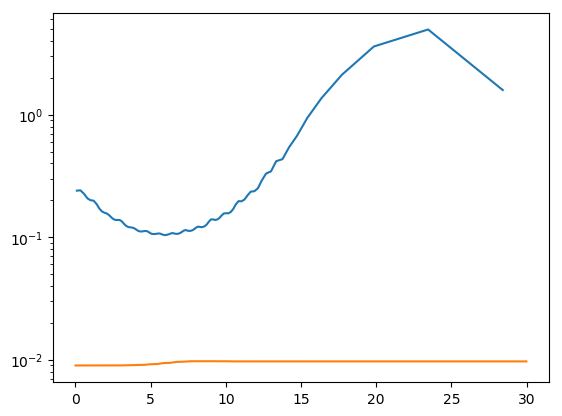

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd59bbe6f28>

In [18]:
semilogy(tt_cf[1:end-1],tt_cf[2:end]-tt_cf[1:end-1])
semilogy(tt_dopri[1:end-3],tt_dopri[2:end-2]-tt_dopri[1:end-3])

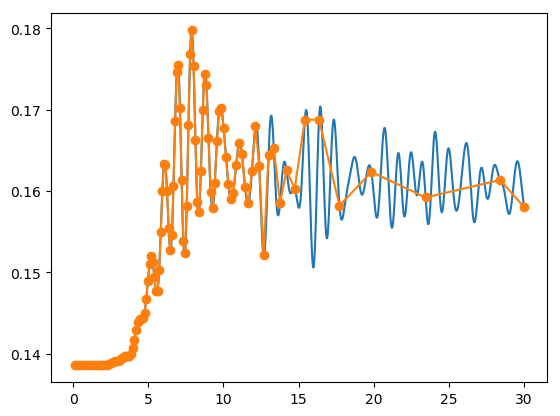

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd59bae4b70>

In [19]:
plot(tt_dopri,dd_dopri)
plot(tt_cf,dd_cf, "o-")

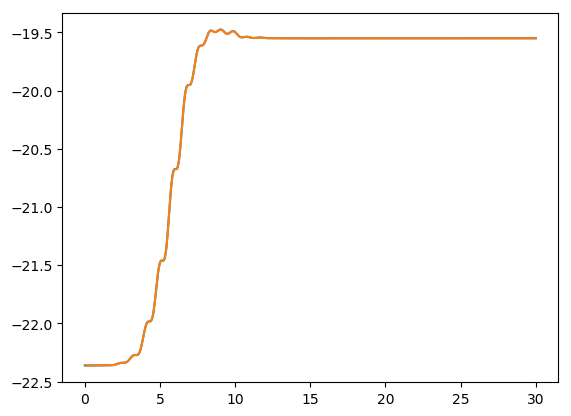

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5832e3470>

In [20]:
plot(tt_dopri,EE_dopri)
plot(tt_cf,EE_cf)